# Big Data tenta

0
1


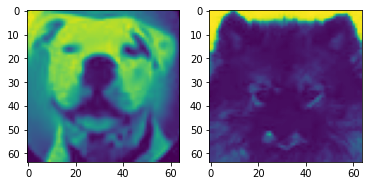

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#1a
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#1b
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#1c
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

#1d 
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

X = pd.read_csv('CATSnDOGS.csv')
y = pd.read_csv('Labels.csv')
pic_num = 26


X_array = np.array(X)
y_array = np.reshape(np.array(y),-1)
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

pic = X_array[pic_num,:]
pic2 = X_array[12,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)
plt.subplot(121)
plt.imshow(pic)
plt.subplot(122)
plt.imshow(pic2)
print(y_array[pic_num])
print(y_array[12])

# 12,26,54,85,89,93,117,151,176,180

### Import data - cat = 0, dog = 1

In [ ]:
# Split data
def split_data(X_array,y_array,trainsize = 0.8,shuffle = True, CV = True, cv_num = 6):
    if shuffle == True:
        M = np.c_[np.linspace(0, y_array.shape[0]-1, num=y_array.shape[0]),y_array,X_array]
        np.random.shuffle(M)
        index = M[:,0]
        y_array = M[:,1]
        X_array = M[:,2:]
    if CV == True: 
        X_cv = []
        y_cv = []
        ind_cv = []
        cv_size = int(np.ceil(y_array.shape[0]/cv_num))
        for i in range(cv_num-1):
             X_cv.append(X_array[i*cv_size:(i+1)*cv_size,:])
             y_cv.append(y_array[i*cv_size:(i+1)*cv_size])
             ind_cv.append(index[i*cv_size:(i+1)*cv_size])
        X_cv.append(X_array[cv_size*(cv_num-1):,:])
        y_cv.append(y_array[cv_size*(cv_num-1):])
        ind_cv.append(index[cv_size*(cv_num-1):])

        X_cv = np.array(X_cv)
        y_cv = np.array(y_cv)
        ind_cv = np.array(ind_cv)
        return X_cv,y_cv,ind_cv
    else: 
        X_train = X_array[:int(len(X_array)*trainsize),:]
        X_test = X_array[int(len(X_array)*trainsize):,:]
        y_train = y_array[:int(len(X_array)*trainsize)]
        y_test = y_array[int(len(X_array)*trainsize):]
        index_train = index[:int(len(X_array)*trainsize)]
        index_test = index[int(len(X_array)*trainsize):]
        return X_train,X_test,y_train,y_test,index_train,index_test

    

In [ ]:
knn_acc = []
dtc_acc = []
gnb_acc = []
knn_misslabeld = np.zeros(y_array.shape[0])
dtc_misslabeld = np.zeros(y_array.shape[0])
gnb_misslabeld = np.zeros(y_array.shape[0])
times = 20
cv_num = 6
CV = True

if CV == True:
    for k in range(times): 
        X_cv,y_cv,ind_cv = split_data(X_array,y_array,trainsize = 0.8,shuffle = True, CV = True, cv_num = cv_num)

        for j in range(cv_num): 
            X_test = X_cv[j]
            X_train = np.r_[X_cv[:j],X_cv[j+1:]].reshape(5*33,64*64)
            y_test = y_cv[j]
            y_train = np.r_[y_cv[:j],y_cv[j+1:]].reshape(5*33)
            index_test = ind_cv[j]
            index_train = np.r_[ind_cv[:j],ind_cv[j+1:]].reshape(5*33)

            knn = KNN()
            dtc = DTC()
            gnb = GNB()
            knn_pred = knn.fit(X_train,y_train).predict(X_test)
            accuracy = accuracy_score(knn_pred,y_test)
            knn_acc.append(accuracy)

            dtc_pred = dtc.fit(X_train,y_train).predict(X_test)
            accuracy = accuracy_score(dtc_pred,y_test)
            dtc_acc.append(accuracy)   

            gnb_pred = gnb.fit(X_train,y_train).predict(X_test)
            accuracy = accuracy_score(gnb_pred,y_test)
            gnb_acc.append(accuracy)

            for i in range(len(knn_pred)):
                if y_test[i] != knn_pred[i]:
                    knn_misslabeld[int(index_test[i])] += 1
                if y_test[i] != dtc_pred[i]:
                    dtc_misslabeld[int(index_test[i])] += 1
                if y_test[i] != gnb_pred[i]:
                    gnb_misslabeld[int(index_test[i])] += 1
        print(k)
    all_misslabeld = knn_misslabeld + dtc_misslabeld + gnb_misslabeld

else: 
    for i in range(times): 

        X_train,X_test,y_train,y_test,index_train,index_test = split_data(X_array,y_array, shuffle = True, CV = False)

        knn = KNN(n_neighbors = 5)
        knn_pred = knn.fit(X_train,y_train).predict(X_test)
        accuracy = accuracy_score(knn_pred,y_test)
        knn_acc.append(accuracy)

        dtc = DTC()
        dtc_pred = dtc.fit(X_train,y_train).predict(X_test)
        accuracy = accuracy_score(dtc_pred,y_test)
        dtc_acc.append(accuracy)

        gnb = GNB()
        gnb_pred = gnb.fit(X_train,y_train).predict(X_test)
        accuracy = accuracy_score(gnb_pred,y_test)
        gnb_acc.append(accuracy)

        for i in range(len(knn_pred)):
            if y_test[i] != knn_pred[i]:
                knn_misslabeld[int(index_test[i])] += 1
            if y_test[i] != dtc_pred[i]:
                dtc_misslabeld[int(index_test[i])] += 1
            if y_test[i] != gnb_pred[i]:
                gnb_misslabeld[int(index_test[i])] += 1

    all_misslabeld = knn_misslabeld + dtc_misslabeld + gnb_misslabeld


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


<BarContainer object of 198 artists>

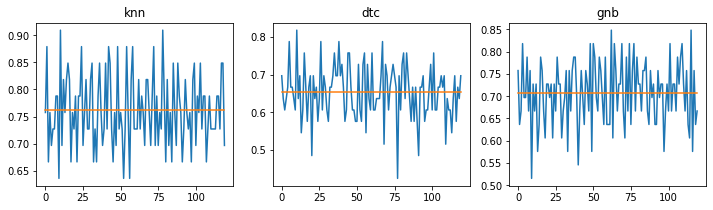

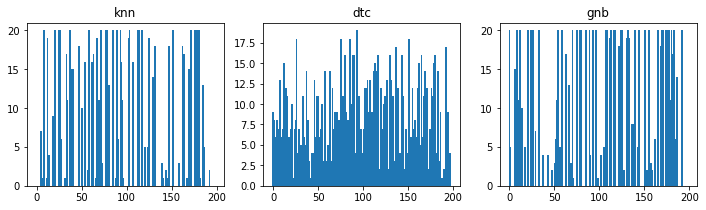

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('knn')
plt.plot(knn_acc)
plt.plot(np.linspace(0, (times*cv_num-1), num=(times*cv_num-1)),np.linspace(np.mean(knn_acc),np.mean(knn_acc), num=(times*cv_num-1)))
plt.subplot(132)
plt.title('dtc')
plt.plot(dtc_acc)
plt.plot(np.linspace(0, (times*cv_num-1), num=(times*cv_num-1)),np.linspace(np.mean(dtc_acc),np.mean(dtc_acc), num=(times*cv_num-1)))
plt.subplot(133)
plt.title('gnb')
plt.plot(gnb_acc)
plt.plot(np.linspace(0, (times*cv_num-1), num=(times*cv_num-1)),np.linspace(np.mean(gnb_acc),np.mean(gnb_acc), num=(times*cv_num-1)))

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('knn')
plt.bar(np.arange(len(knn_misslabeld)),knn_misslabeld, width=2)
plt.subplot(132)
plt.title('dtc')
plt.bar(np.arange(len(dtc_misslabeld)),dtc_misslabeld, width=2)
plt.subplot(133)
plt.title('gnb')
plt.bar(np.arange(len(gnb_misslabeld)),gnb_misslabeld, width=2)

(array([  8,  12,  26,  33,  54,  58,  63,  75,  78,  80,  85,  89,  93,
       107, 112, 113, 117, 125, 130, 131, 151, 165, 171, 176, 177, 180,
       192]),)
0.5925925925925926


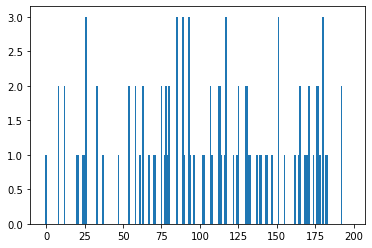

In [ ]:
threshold = 0.8
knn_hard = np.where(knn_misslabeld >= times*threshold)
dtc_hard = np.where(dtc_misslabeld >= times*threshold)
gnb_hard = np.where(gnb_misslabeld >= times*threshold)
all_hard = np.zeros(y_array.shape[0])

all_hard[knn_hard] += 1
all_hard[dtc_hard] += 1
all_hard[gnb_hard] += 1

plt.bar(np.arange(len(all_hard)),all_hard, width=1)

hardest = np.where(all_hard >= 2)
print(hardest)

print(sum(y_array[hardest])/len(hardest[0]))


### 1b)

In [ ]:
feats = X.columns
selected_all = np.zeros(X_array.shape[1])
selected_VT_SKB = np.zeros(X_array.shape[1])
VT = np.zeros(X_array.shape[1])
SKB = np.zeros(X_array.shape[1])
SFM = np.zeros(X_array.shape[1])
maxx = 300
for i in range(1):
    sel_1 = VarianceThreshold(threshold= 5329.5) # 5110 = 500, 5329.5 = 300, 5612 = 100
    X_new_1 = sel_1.fit_transform(X)
    features_selected_1 = np.array(sel_1.get_feature_names_out())

    sel_2 = SelectKBest(chi2, k=maxx)
    X_new_2 = sel_2.fit_transform(X, y)
    features_selected_2 = np.array(sel_2.get_feature_names_out())

    sel_3 = ExtraTreesClassifier(n_estimators=100)
    model = SelectFromModel(sel_3,max_features = maxx).fit(X,y)
    X_new_3 = model.transform(X)
    features_selected_3 = np.array(model.get_feature_names_out())

    ft1 = np.isin(feats,features_selected_1)*1
    VT += ft1
    ft2 = np.isin(feats,features_selected_2)*1
    SKB +=ft2
    ft3 = np.isin(feats,features_selected_3)*1
    SFM +=ft3
    features_selected = ft1 + ft2 +ft3
    feats_VT_SKB = ft2 + ft1
    
    best_features = feats[features_selected == 3]
    best_features_VT_SKB = feats[feats_VT_SKB == 2]
    selected_all += np.isin(feats,best_features)*1
    selected_VT_SKB += np.isin(feats,best_features_VT_SKB)*1

print(selected_all.sum())
print(selected_VT_SKB.sum())

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
14.0
34.0


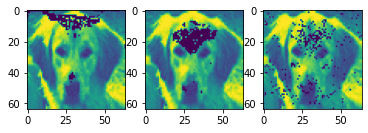

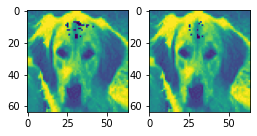

In [ ]:
pic_num = 2
X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_VT = X
X_best_feat_VT[feats[VT != 0]] = 0
X_pic = np.array(X_best_feat_VT)
pic = X_pic[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)

X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_SKB = X
X_best_feat_SKB[feats[SKB != 0]] = 0
X_pic = np.array(X_best_feat_SKB)
pic2 = X_pic[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)

X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_SFM = X
X_best_feat_SFM[feats[SFM != 0]] = 0
pic3 = np.array(X_best_feat_SFM)[pic_num,:]
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)

plt.figure(figsize=(6,2))
plt.subplot(131)
plt.imshow(pic)
plt.subplot(132)
plt.imshow(pic2)
plt.subplot(133)
plt.imshow(pic3)

pic_num = 2
X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_VT = X
X_best_feat_VT[feats[selected_VT_SKB != 0]] = 0
X_pic = np.array(X_best_feat_VT)
pic = X_pic[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)

X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_SKB = X
X_best_feat_SKB[feats[selected_all != 0]] = 0
X_pic = np.array(X_best_feat_SKB)
pic2 = X_pic[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)

plt.figure(figsize=(4,2))
plt.subplot(121)
plt.imshow(pic)
plt.subplot(122)
plt.imshow(pic2)

### 1c

In [ ]:
n_clusters = 2

clustering = SpectralClustering(n_clusters=n_clusters,
assign_labels='discretize',
random_state=0).fit(X_norm)
pred = clustering.labels_
sil_score = metrics.silhouette_score(X_norm, pred, metric='euclidean')
rand_score = metrics.adjusted_rand_score(y_array,pred)
mutual_score = metrics.adjusted_mutual_info_score(y_array, pred)  
print(sil_score)
print(rand_score)
print(mutual_score)
print((pred == 1).sum())
print(y_array[pred == 0].sum())

0.00888837578368272
-0.0017692300417287098
-0.002278940579864857
59
73


(-0.5, 63.5, 63.5, -0.5)

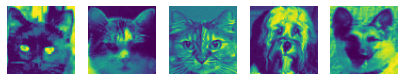

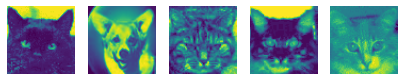

In [ ]:
class_0 = np.array(np.where(pred == 0)).reshape(-1)
class_1 = np.array(np.where(pred == 1)).reshape(-1)
#print(class_0)
#print(class_1)
X_array = np.array(X)
y_array = np.reshape(np.array(y),-1)

pic_num = class_0[1]
pic = X_array[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)

pic_num = class_0[26]
pic2 = X_array[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)

pic_num = class_0[77]
pic3 = X_array[pic_num,:]
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)

pic_num = class_0[88]
pic4 = X_array[pic_num,:]
pic4 = np.rot90(np.reshape(pic4,[64,64]), k=-1)

pic_num = class_0[42]
pic5 = X_array[pic_num,:]
pic5 = np.rot90(np.reshape(pic5,[64,64]), k=-1)

plt.figure(figsize=(7,3))
plt.subplot(151)
plt.imshow(pic)
plt.axis('off')
plt.subplot(152)
plt.imshow(pic2)
plt.axis('off')
plt.subplot(153)
plt.imshow(pic3)
plt.axis('off')
plt.subplot(154)
plt.imshow(pic4)
plt.axis('off')
plt.subplot(155)
plt.imshow(pic5)
plt.axis('off')

X_array = np.array(X)
y_array = np.reshape(np.array(y),-1)

pic_num = class_1[88]
pic = X_array[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)

pic_num = class_1[11]
pic2 = X_array[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)

pic_num = class_1[22]
pic3 = X_array[pic_num,:]
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)

pic_num = class_1[43]
pic4 = X_array[pic_num,:]
pic4 = np.rot90(np.reshape(pic4,[64,64]), k=-1)

pic_num = class_1[35]
pic5 = X_array[pic_num,:]
pic5 = np.rot90(np.reshape(pic5,[64,64]), k=-1)

plt.figure(figsize=(7,3))
plt.subplot(151)
plt.imshow(pic)
plt.axis('off')
plt.subplot(152)
plt.imshow(pic2)
plt.axis('off')
plt.subplot(153)
plt.imshow(pic3)
plt.axis('off')
plt.subplot(154)
plt.imshow(pic4)
plt.axis('off')
plt.subplot(155)
plt.imshow(pic5)
plt.axis('off')

### 1d

In [ ]:
#1e
def get_cats_dogs(y_array,X_array,numb_it = 1):
    y_cats = np.array(np.where(y_array == 0)).reshape(-1)
    y_dogs = np.array(np.where(y_array == 1)).reshape(-1)
    X_cats = X_array[y_cats,:]
    X_dogs = X_array[y_dogs,:]

    chs_cats = []
    dbs_cats = []
    sil_cats = []

    for i in range (numb_it):
        n_clusters = int(i+2)
        clustering = KMeans(n_clusters=n_clusters, random_state=0).fit(X_cats)
        pred_cats = clustering.labels_
        labels_cats = pred_cats

        chs_cats.append(metrics.calinski_harabasz_score(X_cats, pred_cats))
        dbs_cats.append(davies_bouldin_score(X_cats, pred_cats))
        sil_cats.append(metrics.silhouette_score(X_cats,pred_cats))

    chs_dogs = []
    sil_dogs = []
    dbs_dogs = []


    for i in range (numb_it):
        n_clusters = int(i+2)
        clustering = KMeans(n_clusters=n_clusters, random_state=0).fit(X_dogs)
        pred_dogs = clustering.labels_
        labels_dogs = pred_dogs

        chs_dogs.append(metrics.calinski_harabasz_score(X_dogs, pred_dogs))
        sil_dogs.append(metrics.silhouette_score(X_dogs,pred_dogs))
        dbs_dogs.append(davies_bouldin_score(X_dogs, pred_dogs))
    
    return X_cats,X_dogs,labels_cats,labels_dogs,chs_cats,dbs_cats,sil_cats,chs_dogs,sil_dogs,dbs_dogs

NameError: name 'numb_it' is not defined

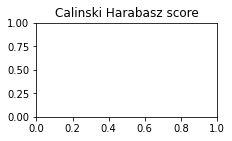

In [ ]:
plt.figure(figsize = (11,3.8))
plt.subplot(231)
plt.title('Calinski Harabasz score')
plt.plot(np.linspace(2,numb_it+1,numb_it),chs_cats)
plt.subplot(233)
plt.title('Davies Bouldin score')
plt.plot(np.linspace(2,numb_it+1,numb_it),dbs_cats)
plt.subplot(232)
plt.title('Silhouette score')
plt.plot(np.linspace(2,numb_it+1,numb_it),sil_cats)

plt.subplot(234)
plt.plot(np.linspace(2,numb_it+1,numb_it),chs_dogs)
plt.subplot(236)
plt.plot(np.linspace(2,numb_it+1,numb_it),dbs_dogs)
plt.subplot(235)
plt.plot(np.linspace(2,numb_it+1,numb_it),sil_dogs)
print(pred_cats)

In [ ]:
animal = 'cats'
if animal == 'dogs':
    class_0 = np.array(np.where(pred_dogs == 0)).reshape(-1)
    class_1 = np.array(np.where(pred_dogs == 1)).reshape(-1)
    X_array = X_dogs
    y_array = y_dogs
elif animal == 'cats':
    class_0 = np.array(np.where(pred_cats == 0)).reshape(-1)
    class_1 = np.array(np.where(pred_cats == 1)).reshape(-1)
    print(pred_cats)
    print(len(class_0))
    print(len(class_1))
    X_array = X_cats
    y_array = y_cats

pic_num = class_0[2]
pic = X_array[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)

pic_num = class_0[3]
pic2 = X_array[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)

pic_num = class_0[4]
pic3 = X_array[pic_num,:]
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)

pic_num = class_0[0]
pic4 = X_array[pic_num,:]
pic4 = np.rot90(np.reshape(pic4,[64,64]), k=-1)

pic_num = class_0[1]
pic5 = X_array[pic_num,:]
pic5 = np.rot90(np.reshape(pic5,[64,64]), k=-1)

plt.figure(figsize=(7,3))
plt.subplot(251)
plt.imshow(pic)
plt.axis('off')
plt.subplot(252)
plt.imshow(pic2)
plt.axis('off')
plt.subplot(253)
plt.imshow(pic3)
plt.axis('off')
plt.subplot(254)
plt.imshow(pic4)
plt.axis('off')
plt.subplot(255)
plt.imshow(pic5)
plt.axis('off')

pic_num = class_1[0]
pic = X_array[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)

pic_num = class_1[7]
pic2 = X_array[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)

pic_num = class_1[2]
pic3 = X_array[pic_num,:]
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)

pic_num = class_1[5]
pic4 = X_array[pic_num,:]
pic4 = np.rot90(np.reshape(pic4,[64,64]), k=-1)

pic_num = class_1[6]
pic5 = X_array[pic_num,:]
pic5 = np.rot90(np.reshape(pic5,[64,64]), k=-1)

plt.subplot(256)
plt.imshow(pic)
plt.axis('off')
plt.subplot(257)
plt.imshow(pic2)
plt.axis('off')
plt.subplot(258)
plt.imshow(pic3)
plt.axis('off')
plt.subplot(259)
plt.imshow(pic4)
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(pic5)
plt.axis('off')

NameError: name 'np' is not defined

### 1e Cats

In [ ]:
def get_cats_dogs_2(y_array,X_array):
    y_cats = np.array(np.where(y_array == 0)).reshape(-1)
    y_dogs = np.array(np.where(y_array == 1)).reshape(-1)
    X_cats = X_array[y_cats,:]
    X_dogs = X_array[y_dogs,:]

    chs_cats = []
    dbs_cats = []
    sil_cats = []

    clustering = KMeans(n_clusters=2, random_state=0).fit(X_cats)
    pred_cats = clustering.labels_
    labels_cats = pred_cats
    chs_cats.append(metrics.calinski_harabasz_score(X_cats, pred_cats))
    dbs_cats.append(davies_bouldin_score(X_cats, pred_cats))
    sil_cats.append(metrics.silhouette_score(X_cats,pred_cats))

    chs_dogs = []
    sil_dogs = []
    dbs_dogs = []

    clustering = KMeans(n_clusters=2, random_state=0).fit(X_dogs)
    pred_dogs = clustering.labels_
    labels_dogs = pred_dogs
    chs_dogs.append(metrics.calinski_harabasz_score(X_dogs, pred_dogs))
    sil_dogs.append(metrics.silhouette_score(X_dogs,pred_dogs))
    dbs_dogs.append(davies_bouldin_score(X_dogs, pred_dogs))

    return X_cats,X_dogs,y_cats,y_dogs,labels_cats,labels_dogs,chs_cats,dbs_cats,sil_cats,chs_dogs,sil_dogs,dbs_dogs

X_cats,X_dogs,y_cats,y_dogs,labels_cats,labels_dogs,chs_cats,dbs_cats,sil_cats,chs_dogs,sil_dogs,dbs_dogs = get_cats_dogs_2(y_array,X_array)

In [ ]:
X_cats
labels_cats
X_dogs
labels_dogs

def split_the_data(X_array,y_array,cv_num):
    M = np.c_[np.linspace(0, y_array.shape[0]-1, num=y_array.shape[0]),y_array,X_array]
    np.random.shuffle(M)
    index = M[:,0]
    y_array = M[:,1]
    X_array = M[:,2:]

    X_cv = []
    y_cv = []
    ind_cv = []
    cv_size = int(np.ceil(y_array.shape[0]/cv_num))
    for i in range(cv_num-1):
         X_cv.append(X_array[i*cv_size:(i+1)*cv_size,:])
         y_cv.append(y_array[i*cv_size:(i+1)*cv_size])
         ind_cv.append(index[i*cv_size:(i+1)*cv_size])
    X_cv.append(X_array[cv_size*(cv_num-1):,:])
    y_cv.append(y_array[cv_size*(cv_num-1):])
    ind_cv.append(index[cv_size*(cv_num-1):])
    X_cv = np.array(X_cv)
    y_cv = np.array(y_cv)
    ind_cv = np.array(ind_cv)
    return X_cv,y_cv,ind_cv

In [ ]:
knn_acc = []
dtc_acc = []
gnb_acc = []
knn_misslabeld = np.zeros(y_array.shape[0])
dtc_misslabeld = np.zeros(y_array.shape[0])
gnb_misslabeld = np.zeros(y_array.shape[0])
times = 30
cv_num = 5


for k in range(times): 
    X_cv,y_cv,index_cv = split_the_data(X_cats,labels_cats,cv_num = 5)
    for j in range(cv_num):
        X_test = X_cv[j]
        y_test = y_cv[j]
        index_test = index_cv[j]
        X_t1 = X_cv[j-4]
        X_t2 = X_cv[j-3]
        X_t3 = X_cv[j-2]
        X_t4 = X_cv[j-1]
        X_train = np.r_[X_t1,X_t2,X_t3,X_t4]
        y_t1 = y_cv[j-4]
        y_t2 = y_cv[j-3]
        y_t3 = y_cv[j-2]
        y_t4 = y_cv[j-1]
        y_train = np.r_[y_t1,y_t2,y_t3,y_t4]
        i_t1 = index_cv[j-4]
        i_t2 = index_cv[j-3]
        i_t3 = index_cv[j-2]
        i_t4 = index_cv[j-1]
        index_train = np.r_[i_t1,i_t2,i_t3,i_t4]

        knn = KNN()
        dtc = DTC()
        gnb = GNB()
        knn_pred = knn.fit(X_train,y_train).predict(X_test)
        accuracy = accuracy_score(knn_pred,y_test)
        knn_acc.append(accuracy)
        dtc_pred = dtc.fit(X_train,y_train).predict(X_test)
        accuracy = accuracy_score(dtc_pred,y_test)
        dtc_acc.append(accuracy)   
        gnb_pred = gnb.fit(X_train,y_train).predict(X_test)
        accuracy = accuracy_score(gnb_pred,y_test)
        gnb_acc.append(accuracy)
        for i in range(len(knn_pred)):
            if y_test[i] != knn_pred[i]:
                knn_misslabeld[int(index_test[i])] += 1
            if y_test[i] != dtc_pred[i]:
                dtc_misslabeld[int(index_test[i])] += 1
            if y_test[i] != gnb_pred[i]:
                gnb_misslabeld[int(index_test[i])] += 1
    print(k)
all_misslabeld = knn_misslabeld + dtc_misslabeld + gnb_misslabeld

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mu

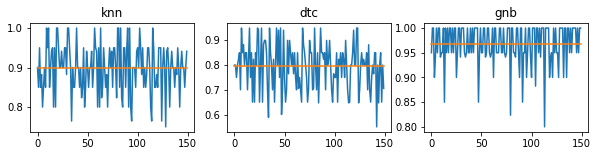

In [ ]:
plt.figure(figsize=(10,2))
plt.subplot(131)
plt.title('knn')
plt.plot(knn_acc)
plt.plot(np.linspace(0, (times*cv_num-1), num=(times*cv_num-1)),np.linspace(np.mean(knn_acc),np.mean(knn_acc), num=(times*cv_num-1)))
plt.subplot(132)
plt.title('dtc')
plt.plot(dtc_acc)
plt.plot(np.linspace(0, (times*cv_num-1), num=(times*cv_num-1)),np.linspace(np.mean(dtc_acc),np.mean(dtc_acc), num=(times*cv_num-1)))
plt.subplot(133)
plt.title('gnb')
plt.plot(gnb_acc)
plt.plot(np.linspace(0, (times*cv_num-1), num=(times*cv_num-1)),np.linspace(np.mean(gnb_acc),np.mean(gnb_acc), num=(times*cv_num-1)))

### Features

In [ ]:
feats = X.columns
X_cats,X_dogs,y_cats,y_dogs,labels_cats,labels_dogs,chs_cats,dbs_cats,sil_cats,chs_dogs,sil_dogs,dbs_dogs = get_cats_dogs_2(y_array,X_array)
df = pd.DataFrame(X_dogs)
labels = labels_dogs
df.columns = X.columns
selected_all = np.zeros(X.shape[1])
selected_VT_SKB = np.zeros(X.shape[1])
VT = np.zeros(X.shape[1])
SKB = np.zeros(X.shape[1])
SFM = np.zeros(X.shape[1])
maxx = 300
for i in range(1):
    sel_1 = VarianceThreshold(threshold= 5027) # CATS [5415 = 500, 5955 = 300, 6314 = 100]
    X_new_1 = sel_1.fit_transform(df)          # Dogs [5027 = 300]
    features_selected_1 = np.array(sel_1.get_feature_names_out())

    sel_2 = SelectKBest(chi2, k=maxx)
    X_new_2 = sel_2.fit_transform(df, labels)
    features_selected_2 = np.array(sel_2.get_feature_names_out())

    sel_3 = ExtraTreesClassifier(n_estimators=100)
    model = SelectFromModel(sel_3,max_features = maxx).fit(df,labels)
    X_new_3 = model.transform(df)
    features_selected_3 = np.array(model.get_feature_names_out())

    ft1 = np.isin(feats,features_selected_1)*1
    VT += ft1
    ft2 = np.isin(feats,features_selected_2)*1
    SKB +=ft2
    ft3 = np.isin(feats,features_selected_3)*1
    SFM +=ft3
    features_selected = ft1 + ft2 +ft3
    feats_VT_SKB = ft2 + ft1
    
    best_features = feats[features_selected == 3]
    best_features_VT_SKB = feats[feats_VT_SKB == 2]
    selected_all += np.isin(feats,best_features)*1
    selected_VT_SKB += np.isin(feats,best_features_VT_SKB)*1

print(selected_all.sum())
#cats 5
#dogs

6.0


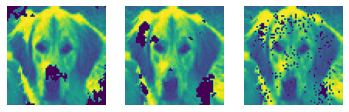

In [ ]:
pic_num = 2 #2

X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_VT = X
X_best_feat_VT[feats[VT != 0]] = 0
X_pic = np.array(X_best_feat_VT)
pic = X_pic[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)

X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_SKB = X
X_best_feat_SKB[feats[SKB != 0]] = 0
X_pic = np.array(X_best_feat_SKB)
pic2 = X_pic[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)

X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_SFM = X
X_best_feat_SFM[feats[SFM != 0]] = 0
pic3 = np.array(X_best_feat_SFM)[pic_num,:]
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)

plt.figure(figsize=(6,2))
plt.subplot(131)
plt.axis('off')
plt.imshow(pic)
plt.subplot(132)
plt.axis('off')
plt.imshow(pic2)
plt.subplot(133)
plt.axis('off')
plt.imshow(pic3)


### 1f

In [ ]:
def get_cluster_set(y_array,X_array):
    y_cats = np.array(np.where(y_array == 0)).reshape(-1)
    y_dogs = np.array(np.where(y_array == 1)).reshape(-1)
    X_cats = X_array[y_cats,:]
    X_dogs = X_array[y_dogs,:]

    chs_cats = []
    dbs_cats = []
    sil_cats = []

    clustering = KMeans(n_clusters=2, random_state=0).fit(X_cats)
    pred_cats = clustering.labels_
    labels_cats = pred_cats
    chs_cats.append(metrics.calinski_harabasz_score(X_cats, pred_cats))
    dbs_cats.append(davies_bouldin_score(X_cats, pred_cats))
    sil_cats.append(metrics.silhouette_score(X_cats,pred_cats))

    chs_dogs = []
    sil_dogs = []
    dbs_dogs = []

    clustering = KMeans(n_clusters=2, random_state=0).fit(X_dogs)
    pred_dogs = clustering.labels_
    labels_dogs = pred_dogs
    chs_dogs.append(metrics.calinski_harabasz_score(X_dogs, pred_dogs))
    sil_dogs.append(metrics.silhouette_score(X_dogs,pred_dogs))
    dbs_dogs.append(davies_bouldin_score(X_dogs, pred_dogs))

    return X_cats,X_dogs,y_cats,y_dogs,labels_cats,labels_dogs,chs_cats,dbs_cats,sil_cats,chs_dogs,sil_dogs,dbs_dogs

X_cats,X_dogs,y_cats,y_dogs,labels_cats,labels_dogs,chs_cats,dbs_cats,sil_cats,chs_dogs,sil_dogs,dbs_dogs = get_cats_dogs_2(y_array,X_array)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=98914b02-c3e6-4d22-a781-75e1a0c3af40' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>